Importar Librerias

In [2]:
import pandas as pd   
import matplotlib.pyplot as plt 
import seaborn as sns  
import numpy as np 
from sklearn.preprocessing import StandardScaler
from scipy.stats import jarque_bera
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.formula.api import rlm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan

</h4>3. Considere el conjunto de datos “Wine Quality” del fichero datos.xls. Defina como variable
respuesta (Y) la columna Densidad y elimine las variables pH, Sulfatos, Cloruros, Acidez
Volátil, Acidez Fija y Calidad de Vino.</h4>

In [3]:
#Carga de base de datos y definicion de variables objetivo y predictoras
path= "datos/datos.xls"
df = pd.read_excel(path, sheet_name= 'Wine Quality', header=2)[['Densidad', 'Alcohol', 'Dióxido de Azúfre Total', 'Dióxido de Azúfre Libre', 'Azúcar Residual', 'Ácido Cítrico']]
df.head(5)

,Densidad,Alcohol,Dióxido de Azúfre Total,Dióxido de Azúfre Libre,Azúcar Residual,Ácido Cítrico
0,1.0010,8.8,170.0,45.0,20.7,0.36
1,0.9940,9.5,132.0,14.0,1.6,0.34
2,0.9951,10.1,97.0,30.0,6.9,0.40
3,0.9956,9.9,186.0,47.0,8.5,0.32
4,0.9956,9.9,186.0,47.0,8.5,0.32


In [4]:
#Verificar si existen datos faltantes en el dataframe
missing_data = df[df.isnull().any(axis=1)]
print("\nCantidad total de filas con datos faltantes:", missing_data.shape[0])


Cantidad total de filas con datos faltantes: 0


Se evidencia que el dataframe no tiene datos faltantes, se procede a desarrollar los siguientes puntos del Taller.

Primero se verifica el comportamiento en la distribución de cada una de las variables del dataframe y la correlación grafica entre estas:

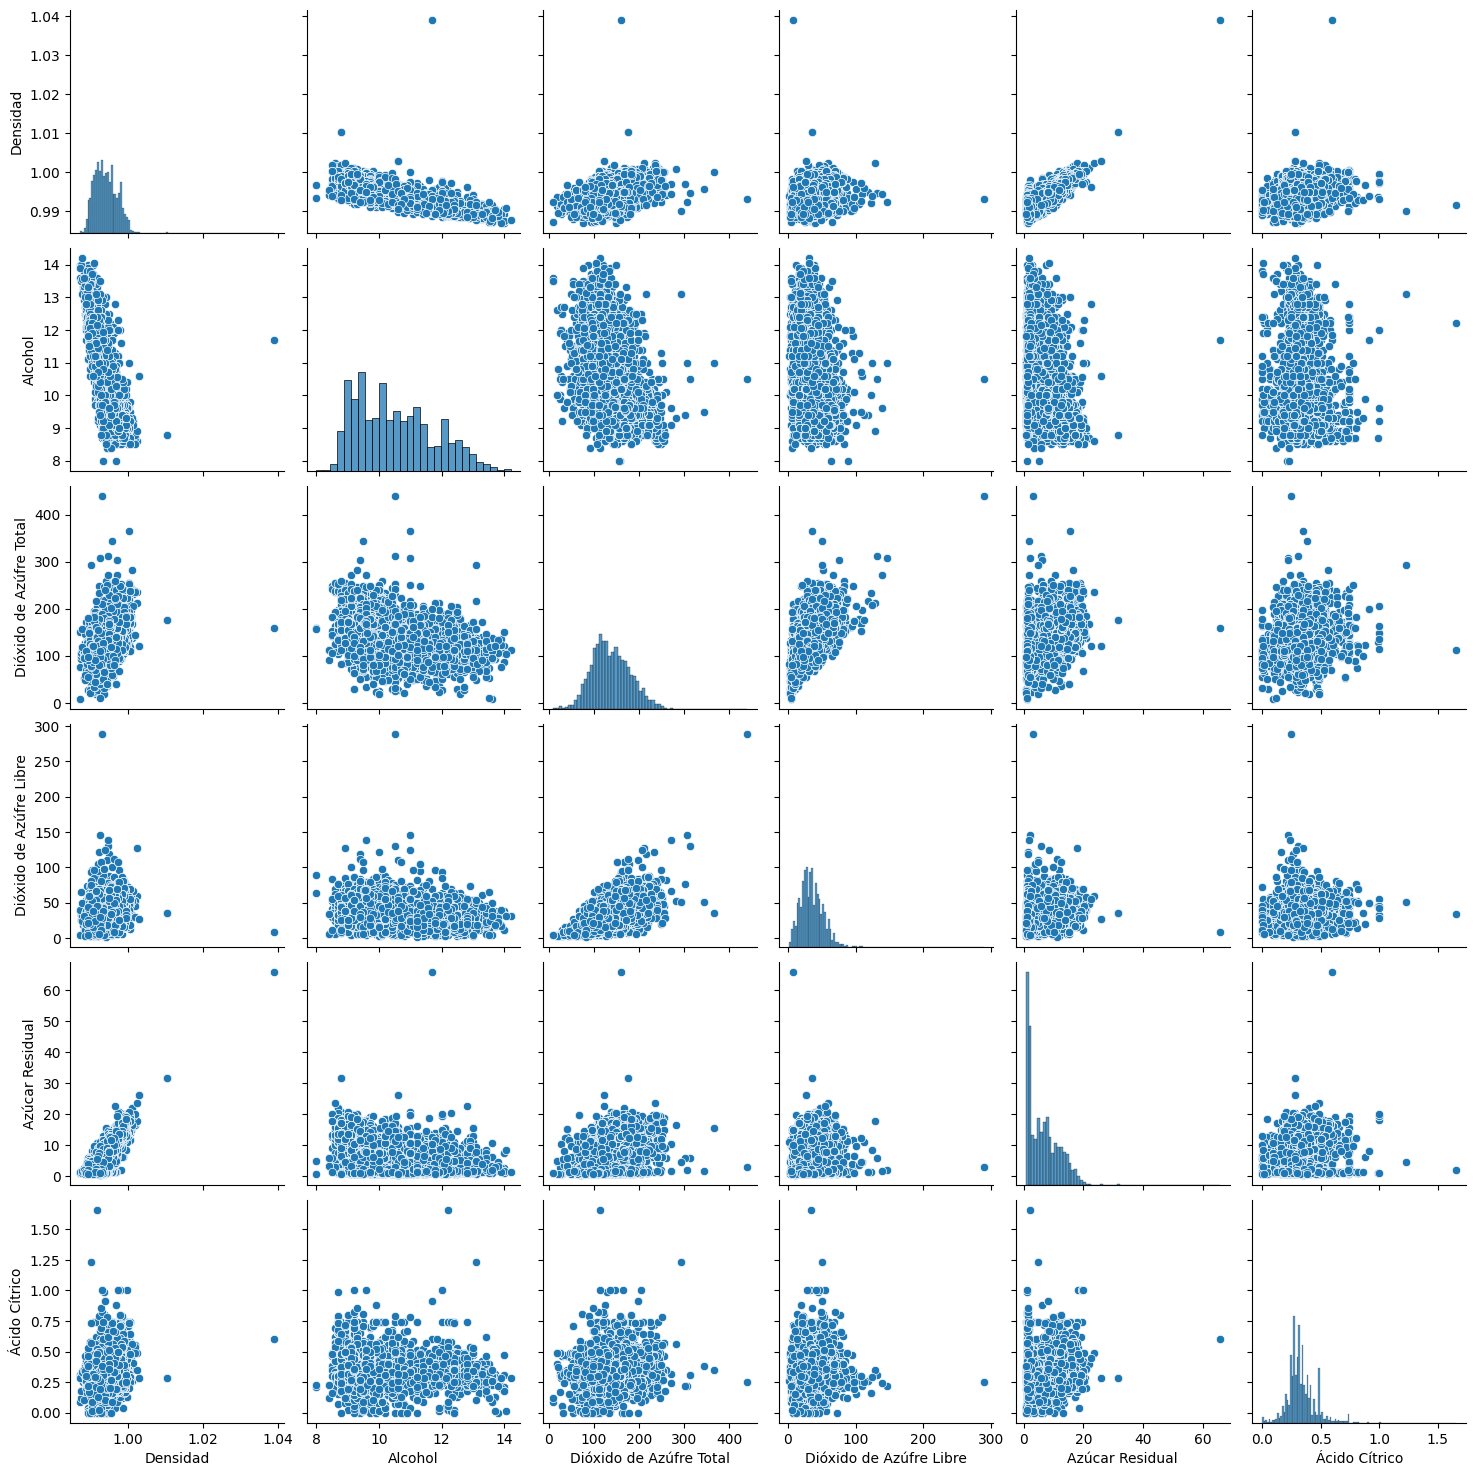

In [5]:
#Verifico como son sus distribuciones y la interaccion entre las mismas
sns.pairplot(df)
plt.show()

Se evidencia que las variables tienden a presentar cierta distribucion normal sin embargo algunas presentan asimetria con sesgo a la derecha, tambien se pueden ver datos atipicos.  De igual forma en cuanto al grado de correlación entre la variable objetivo y las variables predictoras graficamente se puede ver que la variable objetivo presenta una notable correlación con las variables azucar residual y alcohol aunque con esta ultima de manera inversa.

3.1. Estandarizar las variables, calcular las matrices de correlación de Pearson, Kendall y Spearman y compararlas ¿Qué diferencia se encuentra entre las estructuras de dependencias obtenidas?

Ya con la información obtenida del comportamiento de las variables de forma grafica, se procede a particionar los datos en 80% para entrenamiento y 20% para prueba, para asi llevar a cabo el proceso de estandarización de los datos de entrenamiento usando fit y despues estandarizar los datos de prueba aplicando transform; para de esta manera asegurar que el modelo no vea los datos de prueba durante el ajuste de los parámetros (media y desviación estándar), evitando la contaminación de datos, un posible sobreajuste y por ende desarrollar un modelo más preciso con datos que no ha visto (datos de prueba). En ese orden a continuación se lleva a cabo la partición de los datos:

In [6]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

print("Conjunto de entrenamiento:")
train_df

Conjunto de entrenamiento:


,Densidad,Alcohol,Dióxido de Azúfre Total,Dióxido de Azúfre Libre,Azúcar Residual,Ácido Cítrico
4665,0.99272,12.4,111.0,44.0,8.20,0.36
1943,0.99680,9.5,195.0,48.0,11.60,0.44
3399,0.99268,11.1,95.0,25.0,7.40,0.33
843,0.99315,10.8,101.0,33.0,1.70,0.35
2580,0.99976,10.4,174.0,36.0,18.95,0.26
...,...,...,...,...,...,...
4426,0.99418,9.9,123.0,28.0,6.50,0.52
466,0.99560,9.4,141.0,54.0,9.00,0.32
3092,0.99129,11.4,152.0,28.0,3.20,0.52
3772,0.99567,10.6,134.0,53.0,13.70,0.29


In [7]:
print("\nConjunto de prueba:")
test_df


Conjunto de prueba:


,Densidad,Alcohol,Dióxido de Azúfre Total,Dióxido de Azúfre Libre,Azúcar Residual,Ácido Cítrico
4656,0.99370,10.966667,149.0,55.0,10.80,0.41
3659,0.98856,13.200000,128.0,34.0,2.70,0.16
907,0.99080,12.200000,124.0,30.0,2.10,0.39
4352,0.99178,10.700000,148.0,31.0,1.60,0.35
3271,0.99184,12.000000,91.0,27.0,5.70,0.34
...,...,...,...,...,...,...
3207,0.99234,10.900000,126.0,24.0,1.20,0.42
1539,0.99360,10.800000,107.0,32.0,5.00,0.49
964,0.99720,9.500000,152.0,36.0,12.50,0.21
168,0.99680,9.300000,151.0,20.0,8.95,0.31


Se procede a la estandarización de los datos de entrenamiento:

In [8]:
scaler = StandardScaler()
scaler.fit(train_df)
train_df_scaled = pd.DataFrame(scaler.transform(train_df), columns=train_df.columns)
train_df_scaled.head(10)

,Densidad,Alcohol,Dióxido de Azúfre Total,Dióxido de Azúfre Libre,Azúcar Residual,Ácido Cítrico
0,-0.447041,1.540371,-0.641932,0.534065,0.340419,0.227731
1,0.903370,-0.821712,1.355106,0.773947,1.002071,0.895832
2,-0.460280,0.481506,-1.022320,-0.605377,0.184737,-0.022807
3,-0.304718,0.237153,-0.879675,-0.125612,-0.924503,0.144218
4,1.883079,-0.088652,0.855846,0.054300,2.432407,-0.607396
5,0.598865,-0.577359,0.784523,1.253712,0.982611,-0.774421
6,-0.188874,0.644408,-0.142673,0.354153,0.145816,-0.440370
7,-0.682039,0.237153,-1.545354,-1.384995,-0.768820,0.227731
8,1.499139,-1.147517,2.163430,0.803932,1.235595,-0.273345
9,0.337389,-0.821712,-1.141192,-0.845260,0.145816,-0.607396


Ya estandarizados los datos de entrenamiento se procede a calcular las matrices de correlación de Pearson, Kendall y Spearman y compararlas ¿Qué diferencia se encuentra entre las estructuras de dependencias obtenidas?

<h4>Matrices de Correlación</h4>

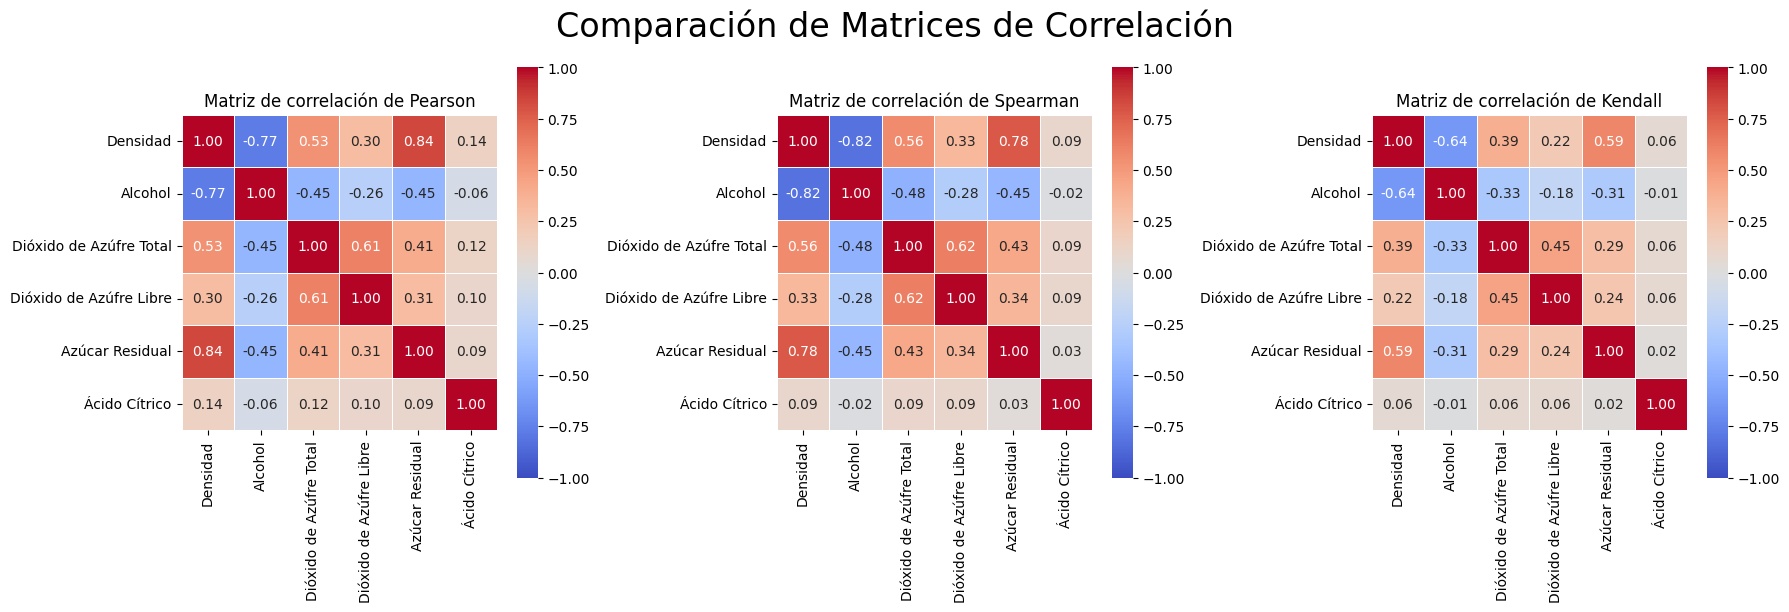

In [9]:
pearson_corr = train_df_scaled.corr(method='pearson')
kendall_corr = train_df_scaled.corr(method='kendall')
spearman_corr = train_df_scaled.corr(method='spearman')

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5, square=True, ax=axes[0])
axes[0].set_title('Matriz de correlación de Pearson')

# Matriz de correlación de Spearman
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5, square=True, ax=axes[1])
axes[1].set_title('Matriz de correlación de Spearman')

# Matriz de correlación de Kendall
sns.heatmap(kendall_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5, square=True, ax=axes[2])
axes[2].set_title('Matriz de correlación de Kendall')

fig.suptitle('Comparación de Matrices de Correlación', fontsize=24)
plt.tight_layout()
plt.show()

En cuanto a que diferencia se encuentra, entre las estructuras de dependencias obtenidas, se puede observar lo siguiente:

1. En la matriz de correlación de Pearson las variables predictoras que mayor correlación tiene con la variable objetivo Densidad en orden de mayor a menor son Azucar residual, Alcohol(esta de forma inversa) y Dioxido de Azufre total respectivamente.
2. En la matriz de correlación de Spearman las variables predictoras que mayor correlación tienen con la variable Densidad en orden de mayor a menor son Alcohol(de forma inversa), Azucar Residual, Dioxido de Azufre total, sin embargo en esta matriz en comparación con la anterior se puede decir que castigo menos aunque no tan significativamente a la variable Dioxido de Azufre Libre; considerando tenerla en cuenta para el modelo 2.
3. En la matriz de Kendall las variables predictoras que mayor correlación tienen con la variable Densidad en orden de mayor a menor son Alcohol(de forma inversa) y Azucar residual, indicando que Kendall castiga con mayor severidad las variables predictoras.

Ya con los resultados obtenidos a partir de las matrices de correlación, las cuales permitieron identificar las variables predictoras de entrada para los modelos RLM, a continuación se muestran cada uno de los 3 modelos desarrollados a partir de las matrices estimadas que posteriormente se compararan e interpretaran los valores de los coeficientes de regresión obtenidos por cada uno, además se procede a validar sus supuestos:

Modelos de regresion RML

MODELO RML 1

In [10]:
train_df_scaled_RLM= train_df_scaled.copy()

X = train_df_scaled_RLM[["Alcohol","Dióxido de Azúfre Total","Azúcar Residual"]]  
Y = train_df_scaled_RLM["Densidad"] 
X = sm.add_constant(X)  

model_RML = sm.RLM(Y, X, M=sm.robust.norms.HuberT())
results_RML = model_RML.fit()

print(results_RML.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:               Densidad   No. Observations:                 3918
Model:                            RLM   Df Residuals:                     3914
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 05 Oct 2024                                         
Time:                        12:08:55                                         
No. Iterations:                    16                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Validación de sus supuestos

R-squared

In [11]:
# 1. Calcular el R-squared (manual)
y_pred = results_RML.predict(X)  # Predicciones del modelo robusto
SS_res = np.sum((Y - y_pred) ** 2)  # Residual sum of squares (SSE)
SS_tot = np.sum((Y - np.mean(Y)) ** 2)  # Total sum of squares (SST)
R2 = 1 - (SS_res / SS_tot)
print(f'R-squared: {R2}')

R-squared: 0.9072641304205432


Autocorrelación de los errores (Durbin_watson)

In [12]:
# 3. Autocorrelación de los errores: Durbin-Watson
dw = durbin_watson(Y - y_pred)  # Residuos del modelo robusto
print(f'Estadística de Durbin-Watson: {dw}')

Estadística de Durbin-Watson: 1.9615796073329228


Supuestos de normalidad de los residuos (Jarque-Bera)

In [13]:
# 4. Normalidad de los errores: Test de Jarque-Bera 
# # Obtener los residuos
residuales_RML = Y - y_pred
# Test de Jarque-Bera
jb_test = sm.stats.jarque_bera(residuales_RML)
print(f'Estadística de Jarque-Bera: {jb_test[0]}')
print(f'P-value de Jarque-Bera: {jb_test[1]}')

Estadística de Jarque-Bera: 5031050.382738647
P-value de Jarque-Bera: 0.0


Evaluación de la distribución normal de los residuales del modelo

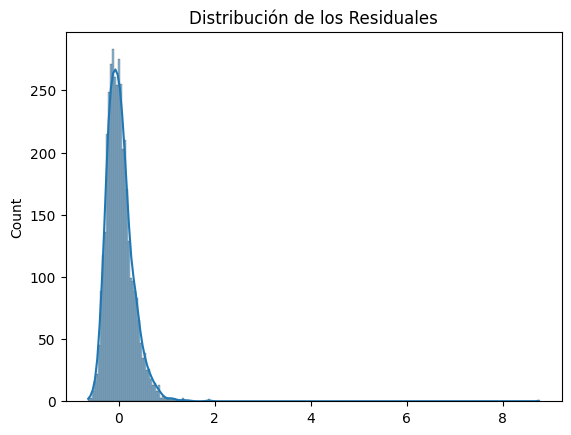

In [14]:
# Graficar el histograma de los residuos
sns.histplot(residuales_RML, kde=True)
plt.title('Distribución de los Residuales')
plt.show()

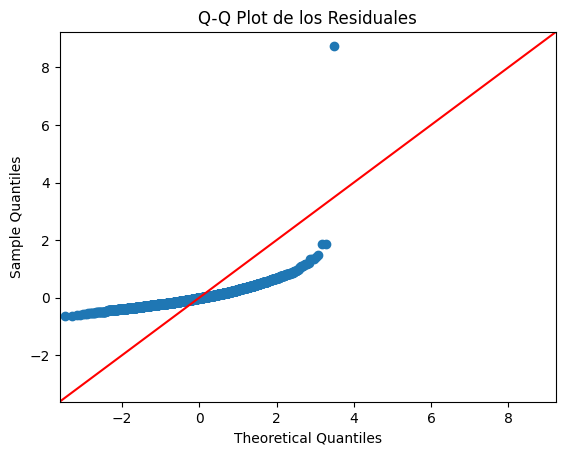

In [15]:
# Q-Q plot para verificar la normalidad
sm.qqplot(residuales_RML, line='45')
plt.title('Q-Q Plot de los Residuales')
plt.show()

Determinación de la heterocedasticidad de los residuales 

In [16]:
# 5. Heterocedasticidad: Test de Breusch-Pagan
lm, lm_pvalue, fvalue, f_pvalue = het_breuschpagan(residuales_RML, X)
print(f'P-value del test de Breusch-Pagan: {f_pvalue}')

P-value del test de Breusch-Pagan: 5.302714014054034e-40


Los supuestos para el modelo RML 1 muestran lo siguiente:

1. El R-squared o coeficiente de determinación ajustado fue del 90.7% es decir que este fue el porcentaje con que los datos se ajustaron al modelo, o el porcentaje de la variabilidad de la variable densidad que fue explicado por las variables predictoras. Siendo para este caso un R-squared alto.
2. Los coeficientes para las variables independientes son significativas ya que su valor siendo este de 0.00 esta por debajo de p-value: 0.05.
3. En cuanto a la Autocorrelación de los errores determinada con el test de Durbin-Watson siendo de 1.962, indica que no hay autocorrelación entre los residuos, esto porque 1.962 se encuentra entre el rango de 1.5 y 2.5, lo que significa que debido a esto, no se rechaza la hipotesis nula de que no existe evidencia muestral que apoye la hipotesis de que hay autocorrelación, por lo tanto se concluye de que los errores son independientes.
5. Ahora para el supuesto de Normalidad de los residuos determinado por el test Jarque-Bera, teniendo en cuenta que este se evalua bajo las siguiente premisa: Si p-value < alpha se rechaza H0 y Si p-value >= alpha no se rechaza H0, siendo alpha:0.05. Dado que dicho valor es Prob(JB):0.00 este es menor que 0.05 por lo tanto se rechaza la hipotesis nula  es decir que los residuales no cumplen con una distribución normal, esto tambien se puede evidenciar en la grafica de los residuales y en la grafica Q-Q Plot de los Residuales, donde en la primera grafica los residuales estan sesgados a la derecha, indicando que no son simetricos alrededor de 0 o en otras palabras no estan formando una campaña; y para el caso de la segunda gráfica los residuales se desvian considerablemente de la recta roja(representación de una distribución normal teorica) que en definitiva confirma que los residuales no son normales.
6. Para el caso de la Heterocedasticidad, esta se evalua bajo la premisa de que la hipotesis nula dice que los residuales son homocedasticos y la Hipotesis alterna dice que estos no son homocedasticos es decir que son heterosedasticos, tendiendo en cuenta que la determinación de este supuesto se hace tambien a partir del p-value < alpha se rechaza H0 y Si p-value >= alpha no se rechaza H0. El modelo 1 teniendo un p-value de 5.302714014051773e-40 siendo este menor a alpha:0.05, indica que los residuales son heterosedasticos, indicando que la varianza de los errores no es constante.

MODELO  RML 2

In [17]:
train_df_scaled_RLM2= train_df_scaled.copy()

X = train_df_scaled_RLM2[["Alcohol","Dióxido de Azúfre Total", "Dióxido de Azúfre Libre", "Azúcar Residual"]]  
Y = train_df_scaled_RLM2["Densidad"] 
X = sm.add_constant(X)  

model_RML2 = sm.RLM(Y, X, M=sm.robust.norms.HuberT())
results_RML2 = model_RML2.fit()

print(results_RML2.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:               Densidad   No. Observations:                 3918
Model:                            RLM   Df Residuals:                     3913
Method:                          IRLS   Df Model:                            4
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 05 Oct 2024                                         
Time:                        12:08:56                                         
No. Iterations:                    24                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Validación de sus supuestos

R-squared

In [18]:
# 1. Calcular el R-squared (manual)
y_pred2 = results_RML2.predict(X)  # Predicciones del modelo robusto
SS_res = np.sum((Y - y_pred2) ** 2)  # Residual sum of squares (SSE)
SS_tot = np.sum((Y - np.mean(Y)) ** 2)  # Total sum of squares (SST)
R2 = 1 - (SS_res / SS_tot)
print(f'R-squared: {R2}')

R-squared: 0.9113090991662895


Autocorrelación de los errores (Durbin_watson)

In [19]:
# 3. Autocorrelación de los errores: Durbin-Watson
dw = durbin_watson(Y - y_pred2)  # Residuos del modelo robusto
print(f'Estadística de Durbin-Watson: {dw}')

Estadística de Durbin-Watson: 1.9643479872709346


Supuestos de normalidad de los residuos (Jarque-Bera)

In [20]:
# 4. Normalidad de los errores: Test de Jarque-Bera 
# Obtener los residuos
residuales_RML2 = Y - y_pred2
# Test de Jarque-Bera
jb_test2 = sm.stats.jarque_bera(residuales_RML2)
print(f'Estadística de Jarque-Bera: {jb_test2[0]}')
print(f'P-value de Jarque-Bera: {jb_test2[1]}')

Estadística de Jarque-Bera: 5008445.213848777
P-value de Jarque-Bera: 0.0


Evaluación de la distribución normal de los residuales del modelo

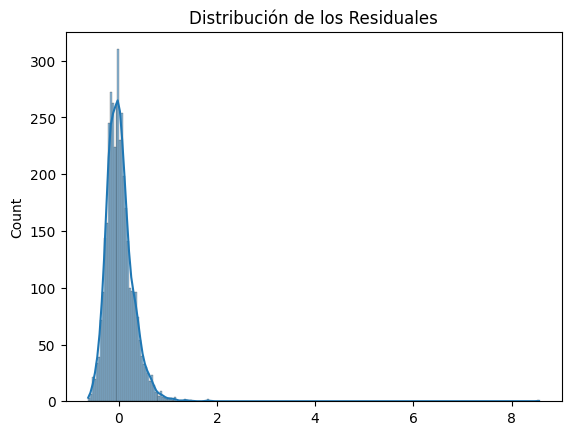

In [21]:
# Graficar el histograma de los residuos
sns.histplot(residuales_RML2, kde=True)
plt.title('Distribución de los Residuales')
plt.show()

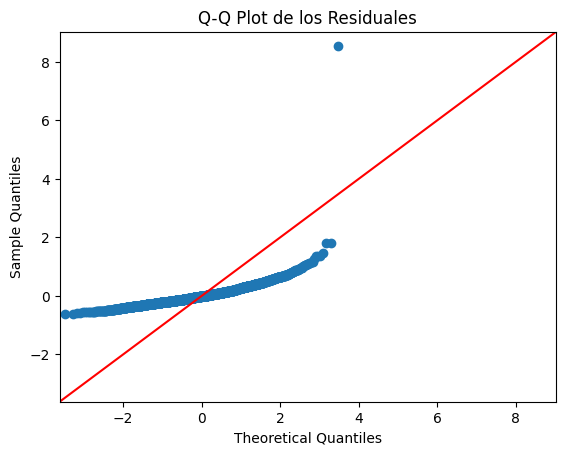

In [22]:
# Q-Q plot para verificar la normalidad
sm.qqplot(residuales_RML2, line='45')
plt.title('Q-Q Plot de los Residuales')
plt.show()

Determinación de la heterocedasticidad de los residuales 

In [23]:
# 5. Heterocedasticidad: Test de Breusch-Pagan
lm, lm_pvalue, fvalue, f_pvalue = het_breuschpagan(residuales_RML2, X)
print(f'P-value del test de Breusch-Pagan: {f_pvalue}')


P-value del test de Breusch-Pagan: 2.656856225184468e-44


Los supuestos para el modelo RML 2 muestran lo siguiente:

1. El R-squared o coeficiente de determinación ajustado fue del 91.1% es decir que este fue el porcentaje con que los datos se ajustaron al modelo, o el porcentaje de la variabilidad de la variable densidad que fue explicado por las variables predictoras. Siendo para este caso un R-squared alto.
2. Los coeficientes para las variables independientes son significativas ya que su valor siendo este de 0.00 esta por debajo de p-value: 0.05.
3. En cuanto a la Autocorrelación de los errores determinada con el test de Durbin-Watson siendo de 1.964, indica que no hay autocorrelación entre los residuos, esto porque 1.962 se encuentra entre el rango de 1.5 y 2.5, lo que significa que debido a esto, no se rechaza la hipotesis nula de que no existe evidencia muestral que apoye la hipotesis de que hay autocorrelación, por lo tanto se concluye de que los errores son independientes.
5. Ahora para el supuesto de Normalidad de los residuos determinado por el test Jarque-Bera, teniendo en cuenta que este se evalua bajo las siguiente premisa: Si p-value < alpha se rechaza H0 y Si p-value >= alpha no se rechaza H0, siendo alpha:0.05. Dado que dicho valor es Prob(JB):0.00 este es menor que 0.05 por lo tanto se rechaza la hipotesis nula  es decir que los residuales no cumplen con una distribución normal, esto tambien se puede evidenciar en la grafica de los residuales y en la grafica Q-Q Plot de los Residuales, donde en la primera grafica los residuales estan sesgados a la derecha, indicando que no son simetricos alrededor de 0 o en otras palabras no estan formando una campaña; y para el caso de la segunda gráfica los residuales se desvian considerablemente de la recta roja(representación de una distribución normal teorica) que en definitiva confirma que los residuales no son normales.
6. Para el caso de la Heterocedasticidad, esta se evalua bajo la premisa de que la hipotesis nula dice que los residuales son homocedasticos y la Hipotesis alterna dice que estos no son homocedasticos es decir que son heterosedasticos, tendiendo en cuenta que la determinación de este supuesto se hace tambien a partir del p-value < alpha se rechaza H0 y Si p-value >= alpha no se rechaza H0. El modelo 1 teniendo un p-value de 2.656856225184468e-44 siendo este menor a alpha:0.05, indica que los residuales son heterosedasticos, indicando que la varianza de los errores no es constante.

MODELO RLM 3

In [24]:
train_df_scaled_RLM3= train_df_scaled.copy()

X = train_df_scaled_RLM3[["Alcohol","Azúcar Residual"]]  
Y = train_df_scaled_RLM3["Densidad"] 
X = sm.add_constant(X)  

model_RML3 = sm.RLM(Y, X, M=sm.robust.norms.HuberT())
results_RML3 = model_RML3.fit()

print(results_RML3.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:               Densidad   No. Observations:                 3918
Model:                            RLM   Df Residuals:                     3915
Method:                          IRLS   Df Model:                            2
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 05 Oct 2024                                         
Time:                        12:08:58                                         
No. Iterations:                    16                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0238      0.004     

Validación de sus supuestos

R-squared

In [25]:
# 1. Calcular el R-squared (manual)
y_pred3 = results_RML3.predict(X)  # Predicciones del modelo robusto
SS_res = np.sum((Y - y_pred3) ** 2)  # Residual sum of squares (SSE)
SS_tot = np.sum((Y - np.mean(Y)) ** 2)  # Total sum of squares (SST)
R2 = 1 - (SS_res / SS_tot)
print(f'R-squared: {R2}')

R-squared: 0.9031706720933186


Autocorrelación de los errores (Durbin_watson)

In [26]:
# 3. Autocorrelación de los errores: Durbin-Watson
dw = durbin_watson(Y - y_pred3)  # Residuos del modelo robusto
print(f'Estadística de Durbin-Watson: {dw}')

Estadística de Durbin-Watson: 1.9722317000827747


Supuestos de normalidad de los residuos (Jarque-Bera)

In [27]:
# 4. Normalidad de los errores: Test de Jarque-Bera 
# Obtener los residuos
residuales_RML3 = Y - y_pred3
# Test de Jarque-Bera
jb_test3 = sm.stats.jarque_bera(residuales_RML3)
print(f'Estadística de Jarque-Bera: {jb_test3[0]}')
print(f'P-value de Jarque-Bera: {jb_test3[1]}')

Estadística de Jarque-Bera: 3564890.1596658756
P-value de Jarque-Bera: 0.0


Evaluación de la distribución normal de los residuales del modelo

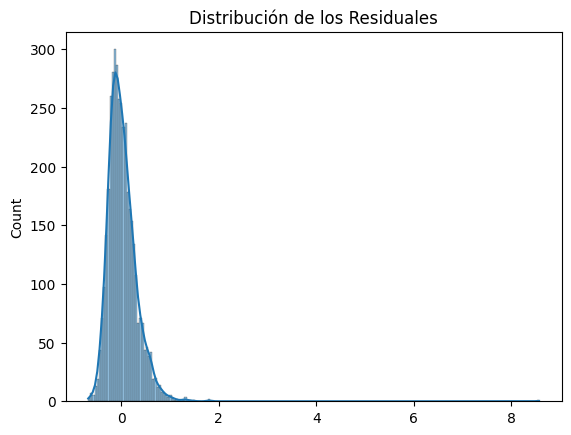

In [28]:
# Graficar el histograma de los residuos
sns.histplot(residuales_RML3, kde=True)
plt.title('Distribución de los Residuales')
plt.show()

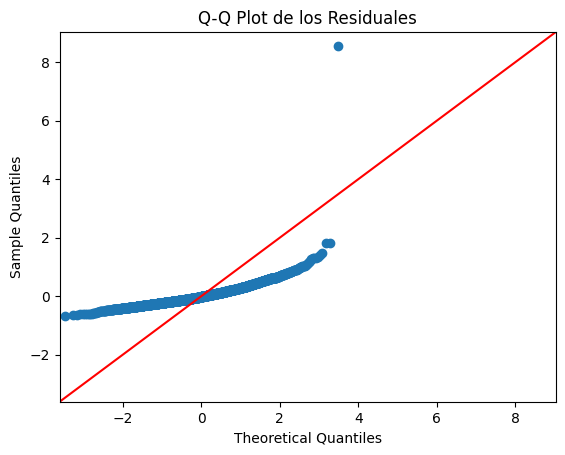

In [29]:
# Q-Q plot para verificar la normalidad
sm.qqplot(residuales_RML3, line='45')
plt.title('Q-Q Plot de los Residuales')
plt.show()

Determinación de la heterocedasticidad de los residuales 

In [30]:
# 5. Heterocedasticidad: Test de Breusch-Pagan
lm, lm_pvalue, fvalue, f_pvalue = het_breuschpagan(residuales_RML3, X)
print(f'P-value del test de Breusch-Pagan: {f_pvalue}')

P-value del test de Breusch-Pagan: 7.930928889382818e-40


Los supuestos para el modelo RML 3 muestran lo siguiente:

1. El R-squared o coeficiente de determinación ajustado fue del 90.31% es decir que este fue el porcentaje con que los datos se ajustaron al modelo, o el porcentaje de la variabilidad de la variable densidad que fue explicado por las variables predictoras. Siendo para este caso un R-squared alto.
2. Los coeficientes para las variables independientes son significativas ya que su valor siendo este de 0.00 esta por debajo de p-value: 0.05.
3. En cuanto a la Autocorrelación de los errores determinada con el test de Durbin-Watson siendo de 1.972, indica que no hay autocorrelación entre los residuos, esto porque 1.962 se encuentra entre el rango de 1.5 y 2.5, lo que significa que debido a esto, no se rechaza la hipotesis nula de que no existe evidencia muestral que apoye la hipotesis de que hay autocorrelación, por lo tanto se concluye de que los errores son independientes.
5. Ahora para el supuesto de Normalidad de los residuos determinado por el test Jarque-Bera, teniendo en cuenta que este se evalua bajo las siguiente premisa: Si p-value < alpha se rechaza H0 y Si p-value >= alpha no se rechaza H0, siendo alpha:0.05. Dado que dicho valor es Prob(JB):0.00 este es menor que 0.05 por lo tanto se rechaza la hipotesis nula  es decir que los residuales no cumplen con una distribución normal, esto tambien se puede evidenciar en la grafica de los residuales y en la grafica Q-Q Plot de los Residuales, donde en la primera grafica los residuales estan sesgados a la derecha, indicando que no son simetricos alrededor de 0 o en otras palabras no estan formando una campaña; y para el caso de la segunda gráfica los residuales se desvian considerablemente de la recta roja(representación de una distribución normal teorica) que en definitiva confirma que los residuales no son normales.
6. Para el caso de la Heterocedasticidad, esta se evalua bajo la premisa de que la hipotesis nula dice que los residuales son homocedasticos y la Hipotesis alterna dice que estos no son homocedasticos es decir que son heterosedasticos, tendiendo en cuenta que la determinación de este supuesto se hace tambien a partir del p-value < alpha se rechaza H0 y Si p-value >= alpha no se rechaza H0. El modelo 1 teniendo un p-value de 7.93092888938992e-40 siendo este menor a alpha:0.05, indica que los residuales son heterosedasticos, indicando que la varianza de los errores no es constante.

En cuanto al valor de los coefientes de regresión obtenidos por cada método, el intercepto o constante para todos los metodos RML tienden a ser muy parecidos, este valor indica que en el caso en que las variables predictoras sean igual a cero, la Densidad obtendria el valor de -0.0236 o -0.0220 o -0.0238 modelos RML 1, RML 2 y RML 3 respectivamente. De igual forma para los tres modelos por cada unidad de Alcohol y el Dioxido de Azufre libre la Densidad disminuye en promedio valores muy parecidos en los 3 metodos, para el caso del Azucar Residual y Dioxido de Azufre total tambien dichos coeficientes son muy parecidos, pero caso contrario al Alcohol, en este por cada unidad de Azucar adicionada la densidad aumenta.

Predicción a partir de los datos de prueba con los modelos ajustados y calculo  del RMSE, comparación entre los modelos para identificar cual predijo mejor.

Antes de proceder con la predicción, se lleva a cabo la estandarización de los datos de prueba aplicando transform:

In [31]:
# Estandarización de los datos de prueba
test_scaled_data = scaler.transform(test_df)

# Convertir la matriz escalada nuevamente a un DataFrame con las columnas originales
test_scaled_df = pd.DataFrame(test_scaled_data, columns=test_df.columns)


PREDICCIÓN CON MODELO RML 1

In [33]:
# Definir la variable objetivo en el conjunto de prueba
y_test = test_scaled_df["Densidad"]

# Definir las variables predictoras escaladas en el conjunto de prueba
X_test = test_scaled_df[["Alcohol","Dióxido de Azúfre Total","Azúcar Residual"]]

# Agregar la constante para el modelo
X_test = sm.add_constant(X_test)

# Realizar las predicciones usando el modelo robusto entrenado
y_pred4 = results_RML.predict(X_test)

# Métricas de rendimiento
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred4)
r2 = r2_score(y_test, y_pred4)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.06823968108486081
R-squared: 0.9237409955529775


PREDICCIÓN CON MODELO RML 2

In [34]:
# Definir las variables predictoras escaladas en el conjunto de prueba
X_test = test_scaled_df[["Alcohol","Dióxido de Azúfre Total", "Dióxido de Azúfre Libre", "Azúcar Residual"]]

# Agregar la constante para el modelo
X_test = sm.add_constant(X_test)

# Realizar las predicciones usando el modelo robusto entrenado
y_pred5 = results_RML2.predict(X_test)

# Métricas de rendimiento
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred5)
r2 = r2_score(y_test, y_pred5)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.06469829371942552
R-squared: 0.9276985561768836


PREDICCIÓN CON MODELO RML 3

In [35]:
# Definir las variables predictoras escaladas en el conjunto de prueba
X_test = test_scaled_df[["Alcohol","Azúcar Residual"]]

# Agregar la constante para el modelo
X_test = sm.add_constant(X_test)

# Realizar las predicciones usando el modelo robusto entrenado
y_pred6 = results_RML3.predict(X_test)

# Métricas de rendimiento
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred6)
r2 = r2_score(y_test, y_pred6)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.07366716783694884
R-squared: 0.9176756867797883


De acuerdo a los resultados obtenidos en las predicciones por cada uno de los modelos desarrollados,  se identifico que el que mejor predijo fue el modelo RML 2 obteniendo un R-squared del 92,8% y un RMSE de 0.0647 siento este último el mas bajo con respecto a los demás modelos. 


Respecto a la validación de los supuestos, los 3 modelos, no cumplieron con los supuestos de normalidad y heterocedasticidad, dando a entender que a pesar de haber obtenido un buen R-squared y cumplir con los demas supuestos como la no autocorrelacion de los errores, la significancia de los coeficientes de las variables independientes y que hay una relación significativa entre las variables predictoras con la variable objetivo, permitiendo entonces no descartar los modelos ya que estos son utiles para predecir, se reduce la confiabilidad de las predicciones. Lo ideal en este caso es buscar la transformación que permita ajustar los modelos para cumplir con estos supuestos.

Realice un análisis del diagrama de dispersión del conjunto de datos ¿Se evidencian comportamientos
totalmente lineales? Si la respuesta es negativa, sugiera y realice transformaciones de variables y justifique el por qué de esa
transformación. Finalmente, genere un modelo RLM e interprételo detalladamente.

Análisis del diagrama de dispersión del conjunto de datos 

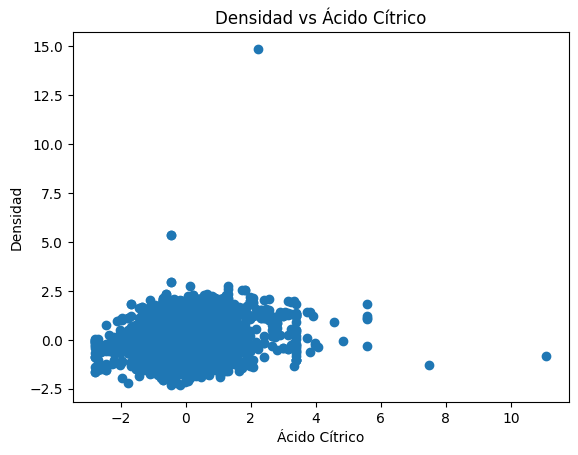

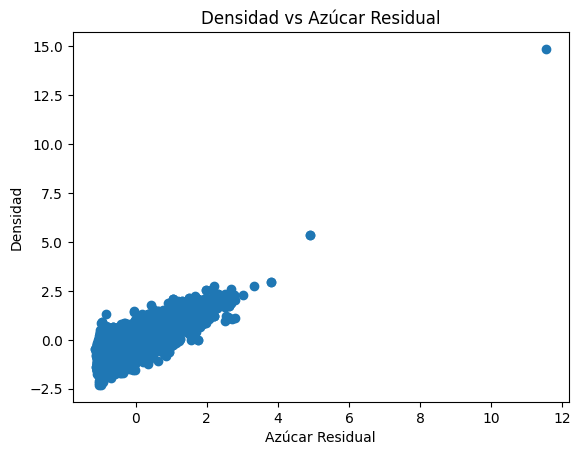

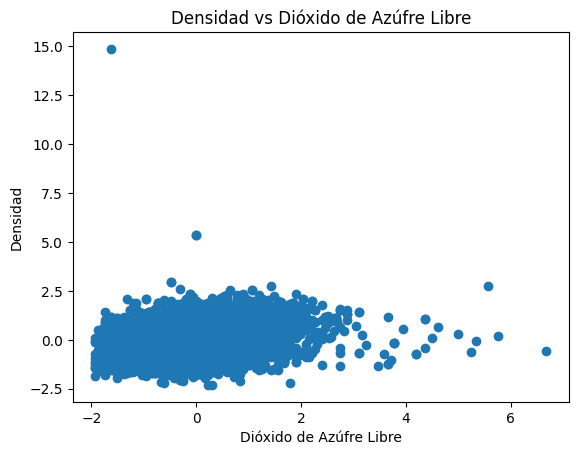

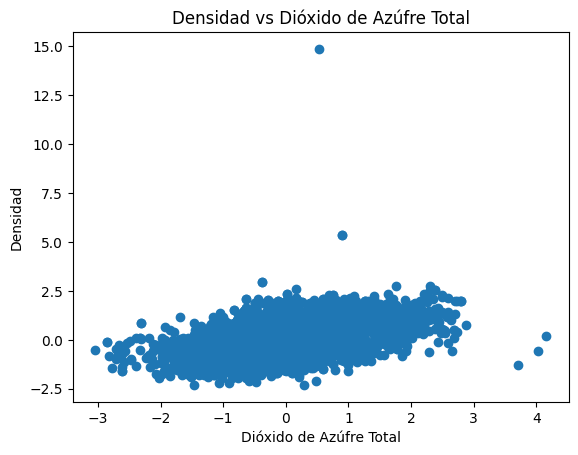

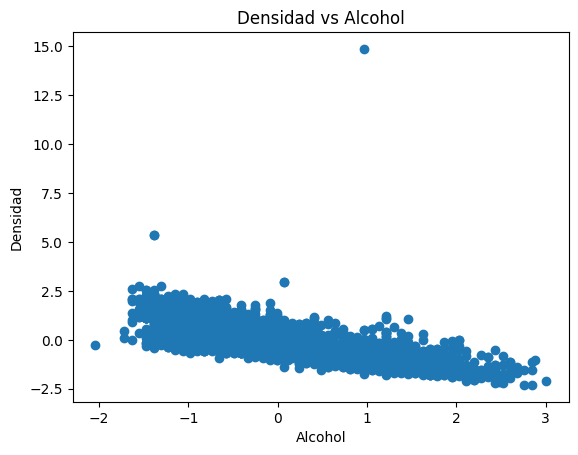

In [36]:
variables_predictoras = ['Ácido Cítrico', 'Azúcar Residual', 'Dióxido de Azúfre Libre', 'Dióxido de Azúfre Total', 'Alcohol']

# Gráficos de dispersión para cada variable predictora
for var in variables_predictoras:
    plt.scatter(train_df_scaled[var], train_df_scaled['Densidad'])
    plt.title(f'Densidad vs {var}')
    plt.xlabel(var)
    plt.ylabel('Densidad')
    plt.show()

¿Se evidencian comportamientos totalmente lineales? Si la respuesta es negativa, sugiera y realice transformaciones
de variables y justiﬁque el por qué de esa transformación. Finalmente, genere un modelo RLM e interprételo detalladamente.

Se evidencia una leve relación pero no necesariamente un comportamiento totalmente lineal entre la variable Densidad con las variables Alcohol, Azucar Residual, Dioxido de Azufre Total y Dioxido de Azufre libre. Para el caso de la interacción de la Densidad con el Alcohol parece haber una tendencia decreciente sin embargo no es completamente lineal, ya que presenta algo de curvatura; con respecto al Azucar Residual se evidencia una acumulacion y no es clara la tendencia, para el Dioxido de Azufre Total parace existir una posible relación pero se puede ver que en el tiempo esta variable al parecer no afecta la densidad en cierto punto y con el Dioxido de Azufre libre tambien se puede evidenciar una leve curvatura. Para el caso de la interacción de la Densidad con el Ácido Cítrico esta tiende a formar mas bien un circulo, descartandola completamemte como una relación lineal. 

Ahora debido a que se identifico que el modelo RML 2 fue el que presento mejores resultados en el R-squared, como y el RMSE en la predicción de la variable objetivo, se va a llevar a cabo la transformación de las variables predictoras de entrada de este modelo, siendo estas Alcohol, Dioxido de azufre total, dioxido de azufre libre y Azucar residual, y posteriormente se correra el mismo modelo para verificar si dichas transformaciones fueron relevantes en el nuevo resultado. A continuación se presenta las transformaciones propuestas para cada variable de acuerdo al comportamiento evidenciado en el análisis del diagrama de dispersión:

Alcohol: Para esta se aplicara Transformación logaritmica, esto porque aunque no sea tan explicita, se ve una leve curvatura, en otras palabras se puede ver
una leve relación exponencial y en este caso esta transformación ayudara a suavizar las diferencias entre los valores mas altos de esta variable.
Dioxido de azufre total y Dioxido de azufre libre: Para estas se aplicara transformación inverso o 1/x ya que esta sirve cuando se observa que el aumento en la variable independiente está asociado con una disminución rápida en la variable dependiente, o cuando la relación es de tipo inversa,.
Azucar residual: Como se menciono anteriormente esta relación no tiene necesariamente un comportamiento lineal, sin embargo esta variable refleja una mejor relación con la variable Objetivo por esto se le aplicara la transformación raíz cuadrada que ayudará a suavizar esta relación haciendola mas directa y fácil de ajustar con una línea recta.

Ya definidas las transformaciones para cada variable, se procede a llevar a cabo las mismas a continuación:

Transformación de variables

Para llevar a cabo las transformaciones, esta se va a realizar en el dataframe train_df original es decir sin estandarizar, en ese caso se va a sacar una copia de dicho dataframe para trabajar sobre este:

In [37]:
# Copia del DataFrame original sin estandarizar
train_df_transform = train_df.copy()

# Evitar log(0) sumando 1 a los valores de Alcohol
train_df_transform['Transf_Alcohol'] = np.log(train_df['Alcohol'] + 1) 

# Evitar división por 0 sumando 1 a los valores de Dióxido de Azúfre Total y Libre
train_df_transform['Transf_Dioxido_Azufre_Total'] = 1 / (train_df['Dióxido de Azúfre Total'] + 1)
train_df_transform['Transf_Dioxido_Azufre_Libre'] = 1 / (train_df['Dióxido de Azúfre Libre'] + 1)

# Aplicar raíz cuadrada a Azúcar Residual, manejando los valores negativos si los hay
train_df_transform['Transf_Azucar_Residual'] = np.sqrt(train_df['Azúcar Residual'].clip(lower=0))  # Evita NaN en caso de valores negativos

# Revisa el DataFrame transformado
train_df_transform.head()

,Densidad,Alcohol,Dióxido de Azúfre Total,Dióxido de Azúfre Libre,Azúcar Residual,Ácido Cítrico,Transf_Alcohol,Transf_Dioxido_Azufre_Total,Transf_Dioxido_Azufre_Libre,Transf_Azucar_Residual
4665,0.99272,12.4,111.0,44.0,8.20,0.36,2.595255,0.008929,0.022222,2.863564
1943,0.99680,9.5,195.0,48.0,11.60,0.44,2.351375,0.005102,0.020408,3.405877
3399,0.99268,11.1,95.0,25.0,7.40,0.33,2.493205,0.010417,0.038462,2.720294
843,0.99315,10.8,101.0,33.0,1.70,0.35,2.468100,0.009804,0.029412,1.303840
2580,0.99976,10.4,174.0,36.0,18.95,0.26,2.433613,0.005714,0.027027,4.353160


Ya con las transformaciones se procede a estandarizar el dataframe y correr el modelo:

In [38]:
scaler = StandardScaler()
scaler.fit(train_df_transform)
train_df_scaled2= pd.DataFrame(scaler.transform(train_df_transform), columns=train_df_transform.columns)
train_df_scaled2.head(10)

,Densidad,Alcohol,Dióxido de Azúfre Total,Dióxido de Azúfre Libre,Azúcar Residual,Ácido Cítrico,Transf_Alcohol,Transf_Dioxido_Azufre_Total,Transf_Dioxido_Azufre_Libre,Transf_Azucar_Residual
0,-0.447041,1.540371,-0.641932,0.534065,0.340419,0.227731,1.503307,0.236386,-0.540069,0.527830
1,0.903370,-0.821712,1.355106,0.773947,1.002071,0.895832,-0.821526,-0.805674,-0.607667,1.064260
2,-0.460280,0.481506,-1.022320,-0.605377,0.184737,-0.022807,0.530501,0.641631,0.065062,0.386114
3,-0.304718,0.237153,-0.879675,-0.125612,-0.924503,0.144218,0.291174,0.474765,-0.272163,-1.014974
4,1.883079,-0.088652,0.855846,0.054300,2.432407,-0.607396,-0.037573,-0.638944,-0.361026,2.001266
5,0.598865,-0.577359,0.784523,1.253712,0.982611,-0.774421,-0.552981,-0.611802,-0.714400,1.049707
6,-0.188874,0.644408,-0.142673,0.354153,0.145816,-0.440370,0.686779,-0.147531,-0.480921,0.349503
7,-0.682039,0.237153,-1.545354,-1.384995,-0.768820,0.227731,0.291174,1.484980,1.498266,-0.740684
8,1.499139,-1.147517,2.163430,0.803932,1.235595,-0.273345,-1.191775,-1.011065,-0.615348,1.234227
9,0.337389,-0.821712,-1.141192,-0.845260,0.145816,-0.607396,-0.821526,0.797495,0.325645,0.349503


A continuación se corre el modelo con las variables transformadas y estandarizadas:

MODELO RML 4

In [39]:
train_df_scaled2_RLM= train_df_scaled2.copy()

X = train_df_scaled2_RLM[["Transf_Alcohol","Transf_Dioxido_Azufre_Total","Transf_Dioxido_Azufre_Libre","Transf_Azucar_Residual"]]  
Y = train_df_scaled2_RLM["Densidad"] 
X = sm.add_constant(X)  

model4 = sm.RLM(Y, X, M=sm.robust.norms.HuberT())
results_RML4 = model4.fit()

results_RML4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               Densidad   No. Observations:                 3918
Model:                            RLM   Df Residuals:                     3913
Method:                          IRLS   Df Model:                            4
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 05 Oct 2024                                         
Time:                        12:17:56                                         
No. Iterations:                    20                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.0215      0.004     -4.892      0.000      -0.030      -0.013
Transf_Alcohol                 -0.5186      0.005   -102.477      0.000      -0.529      -0.509
Transf_Dioxido_Azufre_Total    -0.0783      0.006    -13.544      0.000      -0.090      -0.067
Transf_Dioxido_Azufre_Libre     0.0489      0.006      8.808      0.000       0.038       0.060
Transf_Azucar_Residual          0.5443      0.005    107.619      0.000       0.534       0.554
===============================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

Validación de sus supuestos

R-squared

In [40]:
# 1. Calcular el R-squared (manual)
y_pred4 = results_RML4.predict(X)  # Predicciones del modelo robusto
SS_res = np.sum((Y - y_pred4) ** 2)  # Residual sum of squares (SSE)
SS_tot = np.sum((Y - np.mean(Y)) ** 2)  # Total sum of squares (SST)
R2 = 1 - (SS_res / SS_tot)
print(f'R-squared: {R2}')

R-squared: 0.8755256277938296


Autocorrelación de los errores (Durbin_watson)

In [41]:
# 3. Autocorrelación de los errores: Durbin-Watson
dw = durbin_watson(Y - y_pred4)  # Residuos del modelo robusto
print(f'Estadística de Durbin-Watson: {dw}')

Estadística de Durbin-Watson: 1.9937881297082027


Supuestos de normalidad de los residuos (Jarque-Bera)

In [42]:
# 4. Normalidad de los errores: Test de Jarque-Bera 
# Obtener los residuos
residuales_RML4 = Y - y_pred4
# Test de Jarque-Bera
jb_test4 = sm.stats.jarque_bera(residuales_RML4)
print(f'Estadística de Jarque-Bera: {jb_test4[0]}')
print(f'P-value de Jarque-Bera: {jb_test4[1]}')

Estadística de Jarque-Bera: 20826649.820147607
P-value de Jarque-Bera: 0.0


Evaluación de la distribución normal de los residuales del modelo

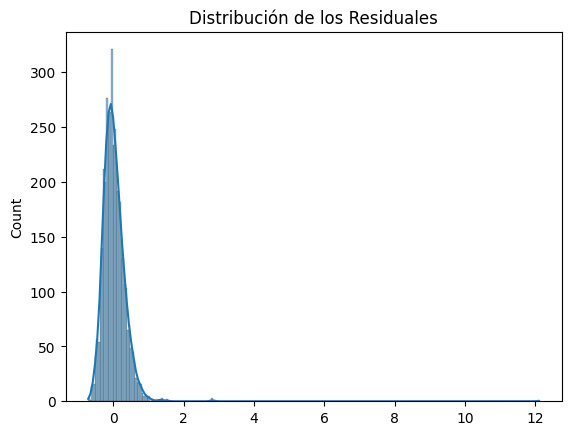

In [43]:
# Graficar el histograma de los residuos
sns.histplot(residuales_RML4, kde=True)
plt.title('Distribución de los Residuales')
plt.show()

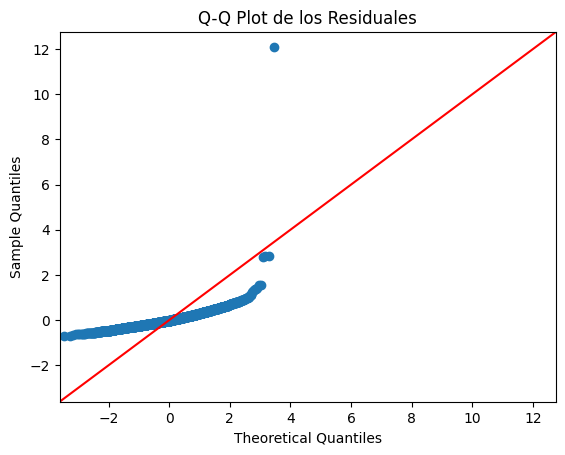

In [44]:
# Q-Q plot para verificar la normalidad
sm.qqplot(residuales_RML4, line='45')
plt.title('Q-Q Plot de los Residuales')
plt.show()


Determinación de la heterocedasticidad de los residuales 

In [45]:
# 5. Heterocedasticidad: Test de Breusch-Pagan
lm, lm_pvalue, fvalue, f_pvalue = het_breuschpagan(residuales_RML4, X)
print(f'P-value del test de Breusch-Pagan: {f_pvalue}')

P-value del test de Breusch-Pagan: 1.890847541512592e-15


Los supuestos para el modelo RML 4 muestran lo siguiente:

1. El R-squared o coeficiente de determinación ajustado fue del 87.55% es decir que este fue el porcentaje con que los datos se ajustaron al modelo, o el porcentaje de la variabilidad de la variable densidad que fue explicado por las variables predictoras. Siendo para este caso un R-squared alto.
2. Los coeficientes para las variables independientes son significativas ya que su valor siendo este de 0.00 esta por debajo de p-value: 0.05.
3. En cuanto a la Autocorrelación de los errores determinada con el test de Durbin-Watson siendo de 1.994, indica que no hay autocorrelación entre los residuos, esto porque 1.962 se encuentra entre el rango de 1.5 y 2.5, lo que significa que debido a esto, no se rechaza la hipotesis nula de que no existe evidencia muestral que apoye la hipotesis de que hay autocorrelación, por lo tanto se concluye de que los errores son independientes.
5. Ahora para el supuesto de Normalidad de los residuos determinado por el test Jarque-Bera, teniendo en cuenta que este se evalua bajo las siguiente premisa: Si p-value < alpha se rechaza H0 y Si p-value >= alpha no se rechaza H0, siendo alpha:0.05. Dado que dicho valor es Prob(JB):0.00 este es menor que 0.05 por lo tanto se rechaza la hipotesis nula  es decir que los residuales no cumplen con una distribución normal, esto tambien se puede evidenciar en la grafica de los residuales y en la grafica Q-Q Plot de los Residuales, donde en la primera grafica los residuales estan sesgados a la derecha, indicando que no son simetricos alrededor de 0 o en otras palabras no estan formando una campaña; y para el caso de la segunda gráfica los residuales se desvian considerablemente de la recta roja(representación de una distribución normal teorica) que en definitiva confirma que los residuales no son normales.
6. Para el caso de la Heterocedasticidad, esta se evalua bajo la premisa de que la hipotesis nula dice que los residuales son homocedasticos y la Hipotesis alterna dice que estos no son homocedasticos es decir que son heterosedasticos, tendiendo en cuenta que la determinación de este supuesto se hace tambien a partir del p-value < alpha se rechaza H0 y Si p-value >= alpha no se rechaza H0. El modelo 1 teniendo un p-value de 1.890847541512592e-15 siendo este menor a alpha:0.05, indica que los residuales son heterosedasticos, indicando que la varianza de los errores no es constante.

Llevando a cabo la transformacion de las variables para de esta manera mejorar los resultados obtenidos con los modelos sin tansformación, se identifico que además de seguir incumpliendo con los supuestos de normalidad y heterocedasticidad de los errores, este modelo arrojo un R-Squared mucho mas bajo que los modelos anteriores, dando a entender que esta transformación no soluciono los problemas de los  modelos anteriores y al contrario provoco una reducción en el porcentaje de la variabilidad de la variable densidad que fue explicado por las variables predictoras.